# Tandem Piercer Experiment - Measurement report

## Initialization

Load required Python libraries:

In [1]:
import os
from tpe.Stats import Stats
from tpe.functions import md, load_styles, get_report_header

Load inline graphics utility (and optionally output current working directory name):

In [2]:
%pylab inline
#print("\nCurrent directory: %s" % os.getcwd())

Populating the interactive namespace from numpy and matplotlib


Initialize statistic class and output experiment statistic files to use in this report:

In [3]:
st = Stats()
st.print_experiment_stat_files("../experiments/default_2022_2_28*");

../experiments\default_2022_2_28_22_16\statistics.csv


Output header, general settings, instrument details and trigger info for the selected measurement:

In [4]:
directory = "../experiments\default_2022_2_28_22_16"
get_report_header(directory)

<h2>Background day pattern with double lead shield around front detector</h2><h3>General settings</h3>                <table>                <tr><th>Pulse source</th><td>Background</td></tr>                <tr><th>Pulse detection</th><td>SCA `(pos[:-1] & ~pos[1:]).nonzero()`</td></tr>                <tr><th>Sample size</th><td>8e-06s</td></tr>                <tr><th>Resolution</th><td>8e-09s</td></tr>                <tr><th>PicoScope trigger</th><td>simple, alternate: True </td></tr>                <tr><th>Detector geometry</th><td>apart</td></tr>                <tr><th>Front detector</th><td>na</td></tr>                <tr><th>PMT High Voltage</th><td>-1000</td></tr>                </table>
<h3>SCA instrument details</h3>
|             | Detector A   | Detector B   |
|:------------|:-------------|:-------------|
| Sca Model   | Ortec 490B   | Ortec 490B   |
| Coarse Gain | 4.0          | 4.0          |
| Fine Gain   | 3.75         | 10.0         |
| Mode        | diff         | diff         |
| Window      | 10.0         | 10.0         |
| Lower Level | 0.7          | 0.4          |
<h3>ADC limits for PicoScope channels</h3>
|                 | A (0)   | B (1)   | C (2)   | D (3)   |
|:----------------|:--------|:--------|:--------|:--------|
| Voltage range   | 10V     | 10V     | 20V     | 20V     |
| ADC low limits  | 4096    | 4096    | 842     | 576     |
| ADC high limits | 32768   | 32768   | 19661   | 19661   |
<h3>PicoScope channel map</h3>
|                        |   Detector A |   Detector B |
|:-----------------------|-------------:|-------------:|
| Sca Square Pulse Index |            0 |            1 |
| Raw Pulse Index        |            2 |            3 |
<h3>PicoScope trigger details</h3>            <table>            <tr><th>Channel (start)</th><td>0</td></tr>            <tr><th>Delay (samples)</th><td>0</td></tr>            <tr><th>Direction</th><td>RISING</td></tr>            <tr><th>Threshold (ADC)</th><td>16384</td></tr>            </table>


In [5]:
st = Stats()
st.read_stats_dataframe(directory);
st.print_basic_data();



Start time:	2022-02-28 20:16:17
End time:	2022-03-01 20:16:17
Time elapsed:	1 day, 0:00:00
Rows count:	227209
Total count A:	98459
Total count B:	128764
Elapsed rate A:	1.14/s
Elapsed rate B:	1.49/s
Sample rate A:	95780.3/s
Sample rate B:	124982.1/s


Total coincidences:		13
Single coincidences:		13
Coincidence elapsed rate:	0.0/s (1/2:48:48s)
Coincidence sample rate:	8.29/s


In [6]:
from fractions import Fraction
ratio = st.rate_a() / st.rate_b()
print("Count A / Count B = %f (%s)" % (ratio, Fraction(round(ratio, 2)).limit_denominator()))

Count A / Count B = 0.766352 (77/100)


## Calibration

Energy scales have been calibrated with Cadmium-109 and Cobalt-57 sources. The calibration procedure can be found from the [whole spectra calibration](https://nbviewer.org/github/markomanninen/tandempiercerexperiment/blob/main/report_template/TPE%20report%20-%20whole%20spectra%20calibration.ipynb) notebook document.

In [7]:
from tpe.Stats import add_calibration_line, plot_peak_lines

gamma_photo_peak_cd109_kev = 88
# Cd-109 1μci
gamma_photo_peak_cd109_adc_a = 6515 #6181
gamma_photo_peak_cd109_adc_b = 6504 #6729
# Cd-109 10μci
#gamma_photo_peak_cd109_adc_a = 6261
#gamma_photo_peak_cd109_adc_b = 6453

gamma_photo_peak_co57_kev = 122
# C0-57 10μci
#gamma_photo_peak_co57_adc_a = 8532
#gamma_photo_peak_co57_adc_b = 8684

st.adc_calibrate_a(gamma_photo_peak_cd109_adc_a, gamma_photo_peak_cd109_kev)
st.adc_calibrate_b(gamma_photo_peak_cd109_adc_b, gamma_photo_peak_cd109_kev)

Set sunrise and sunset times based on the start time of the measurement and geolocation to determine if there is any pattern in the radiation that might be caused by the rotation of Earth. Angle toward Sun and Galaxy may give different flux of radiation, especially if collimator is used to orient detectors to certain direction.

In [8]:
st.set_and_print_sunrise_and_sunset(longitude=25.050708, latitude=60.215023, timezone='Europe/Helsinki')

Sun rise: 07:07:10
Sun set: 17:05:28


## Plots

### Detector event timeline

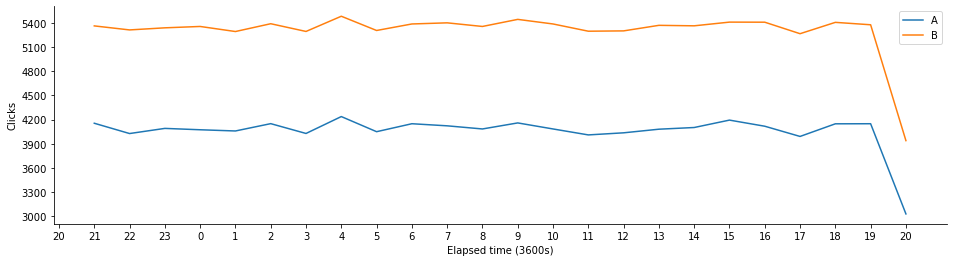

In [9]:
start_time = [2022, 2, 28, 21]
hour = 3600
st.plot_channel_counts(sec=hour, start_time=start_time)

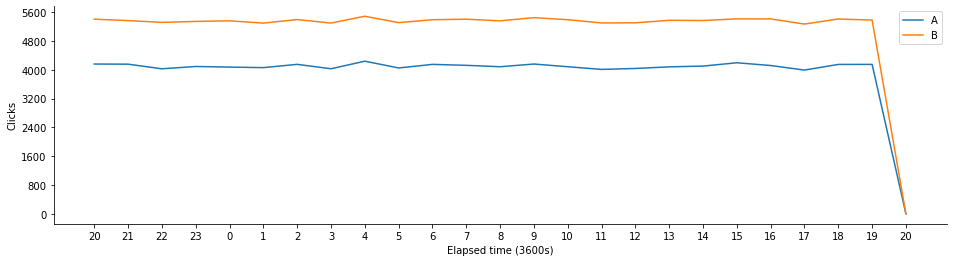

In [10]:
st.plot_channel_counts(sec=hour)

In [11]:
#st.plot_channel_counts(sec=hour, coincidences=True)

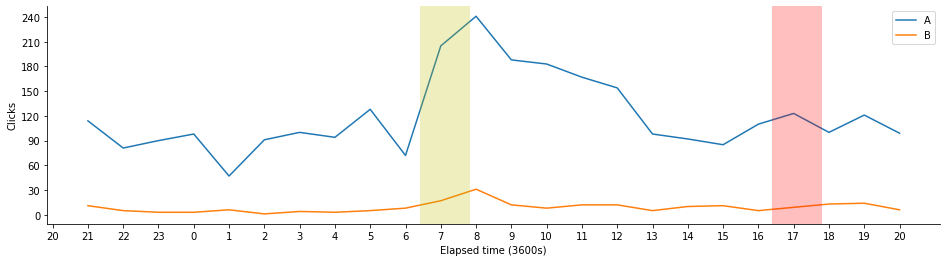

In [12]:
low_and_high = {'low': [0,3], 'high': [50,50]}
st.plot_channel_counts(sec=hour, start_time=start_time, sunlines=True, **low_and_high)

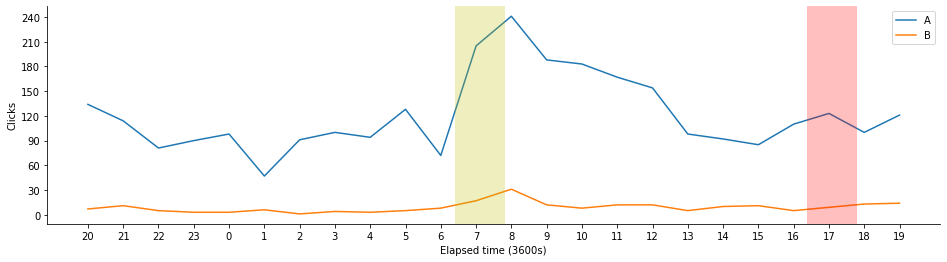

In [13]:
st.plot_channel_counts(sec=hour, sunlines=True, **low_and_high)

In [14]:
#low_and_high = {'low': [65,65], 'high': [155,155]}
#st.plot_channel_counts(sec=hour, coincidences=True, **low_and_high)

### Pulse height spectrum

Plot pulse height spectrum by bar graph, line graph, fitted curve and scatter version.

Peaks are automatically detected by using `scipy.find_peaks` algorithm and then drawn to the plots.

#### Channel A

Maximum bins: 68


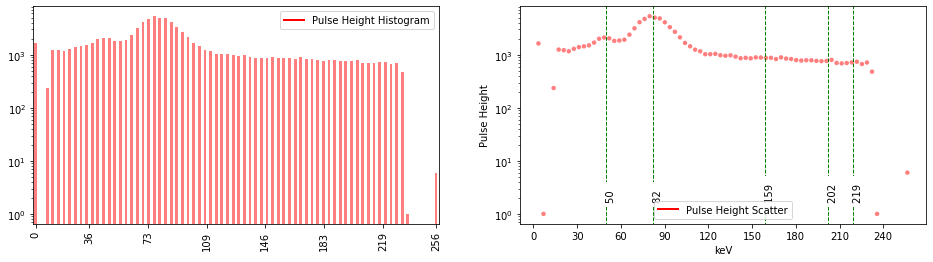

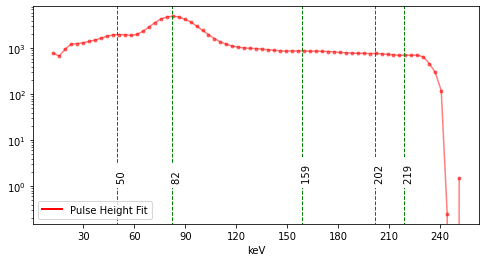

In [15]:
st.reset_calibration_lines()
for peak in st.plot_channel_pulse_height_spectrum("A", bins=73, rolling=4)[:2]:
    st.add_calibration_line_a(round(peak, 1))

#### Channel B

Maximum bins: 70


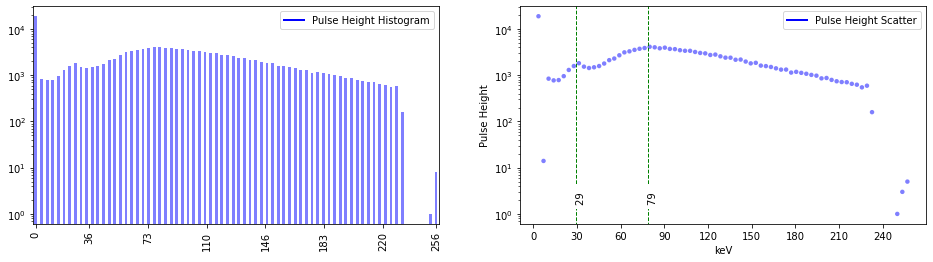

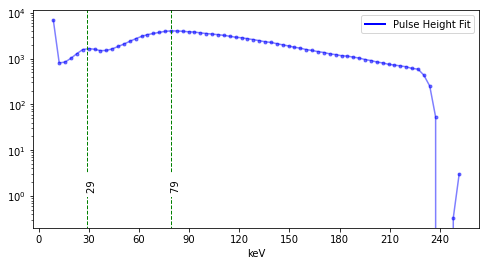

In [16]:
for peak in st.plot_channel_pulse_height_spectrum("B", coincidences=False, bins=73, rolling=3)[:2]:
    st.add_calibration_line_b(round(peak, 1))

### Coincidence time difference and scatter plots

Time difference is retrieved when one of the detectors triggers and if there is a pulse in the other detector then a time distance between clicks is calculated by substracting the index of the pulses and multiplying that by the resolution of the oscilloscope. Typically, when there is a peak in the middle of the time difference histogram, it suggests that clicks were coincident and caused either by the same ray passing both detectors or two simultaneous rays coming in a stream.

In the color scatter plot channels are distinguished by the red and blue colors. The size of the point relates to the time difference. Bigger the point, smaller is the time difference.

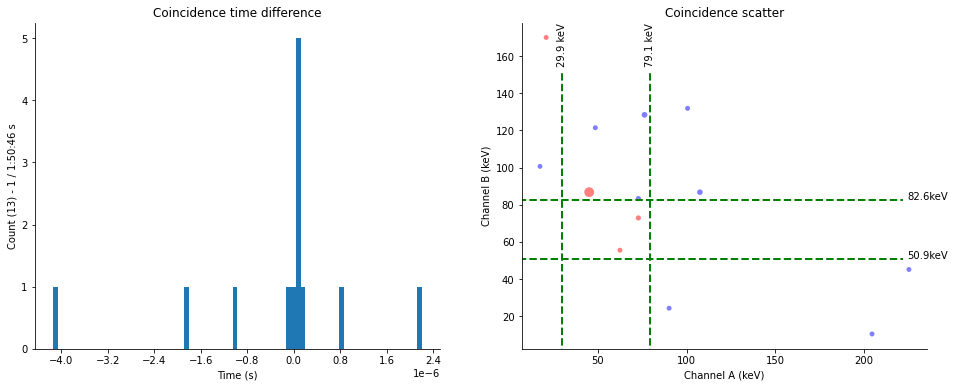

In [17]:
st.plot_time_histogram_and_scatter(hide_calibration=True)

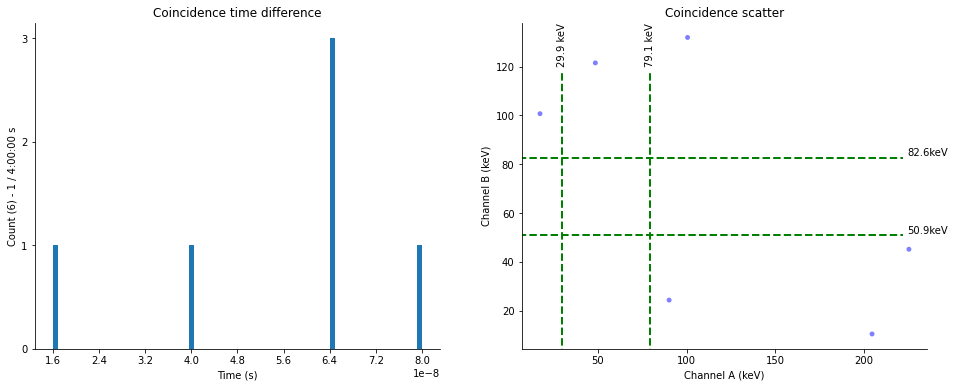

In [18]:
st.plot_time_histogram_and_scatter(hide_calibration=True, time_difference=10)

### Coincident spectra

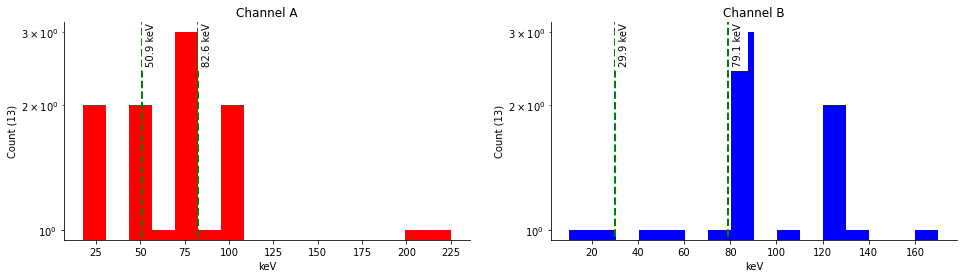

In [19]:
st.plot_spectra(coincidences=True, log=True, bins=(16, 16), hide_calibration=True);

## Stats

In [20]:
st.print_stats_link()

<br/><center><h3>Download csv file: <a target='_blank' href='https://github.com/markomanninen/tandempiercerexperiment/raw/main/experiments\default_2022_2_28_22_16\statistics.csv'>statistics.csv</a></h3></center>

Output statistics head and tail:

In [21]:
d = st.stats[:]
d["Elapsed"] = d["Elapsed"].astype(int)
d["RateA"] = d["RateA"].astype(int)
d["RateB"] = d["RateB"].astype(int)
d

,RateCount,Time,Elapsed,A,B,TotA,TotB,RateA,RateB,Cnc,TotCnc,ElapsedCncRate,SampleCncRate,TimeDifference,APulseHeight,BPulseHeight,SampleSize,Chn
0,1,2022-02-28 20:16:17.391111851,0,1,0,1,0,250000,0,0,0,0.000,0.000,nan,5390,0,0.000,0
1,2,2022-02-28 20:16:17.536680697,0,0,1,1,1,125000,125000,0,0,0.000,0.000,nan,0,8209,0.000,1
2,4,2022-02-28 20:16:18.580885172,1,0,1,1,2,62500,125000,0,0,0.000,0.000,nan,0,12827,0.000,1
3,5,2022-02-28 20:16:18.680618525,1,1,0,2,2,100000,100000,0,0,0.000,0.000,nan,8470,0,0.000,0
4,6,2022-02-28 20:16:18.731482506,1,0,1,2,3,83333,125000,0,0,0.000,0.000,nan,0,5387,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227204,257536,2022-03-01 20:16:15.830589533,86398,0,1,98457,128762,95575,124994,0,13,0.000,12.620,nan,0,6926,1.030,1
227205,257537,2022-03-01 20:16:16.376085997,86399,1,0,98458,128762,95576,124993,0,13,0.000,12.620,nan,5903,0,1.030,0
227206,257538,2022-03-01 20:16:16.500792503,86399,0,1,98458,128763,95576,124994,0,13,0.000,12.619,nan,0,5387,1.030,1
227207,257539,2022-03-01 20:16:16.836333036,86399,1,0,98459,128763,95576,124993,0,13,0.000,12.619,nan,6160,0,1.030,0


In [22]:
load_styles("../report.css")